In [3]:
#Imports
import numpy as np
import random
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
#Initialize the grid maze environment as a 2D array.
maze = np.array([
    [1, 1, 0, 1, 0, 1],
    [1, 1, 1, 1, 0, 'G'],
    [1, 0, 0, 1, 1, 1],
    [1, 1, 'I', 0, 1, 1],
    [1, 1, 1, 1, 0, 1],
    [1, 1, 0, 1, 1, 1]
], dtype =object)
n_rows, n_cols = maze.shape

In [5]:
#Actions (North, South, East & West)
actions = [0, 1, 2, 3]
n_actions = len(actions)

In [57]:
#Helper functions

def state_to_index(state):
    return state[0] * n_cols + state[1]

def is_valid_state(state):
    r, c = state
    if r < 0 or r>= n_rows or c < 0 or c >= n_cols:
        return False
    if maze[r, c] == 1:
        return False
    return True

def is_goal(state):
    r, c = state
    # Make sure we index a single element
    value = maze[r, c]
    
    # If value is an array, take the scalar
    if isinstance(value, np.ndarray):
        value = value.item()  # converts 0-d array to scalar
    
    return value == 'G'

def step(state, action):
    r, c = state
    if action == 0:
        next_state = (r - 1, c)
    elif action == 1:
        next_state = (r, c + 1)
    elif action == 2:
        next_state = (r + 1, c)
    elif action == 3:
        next_state = (r, c - 1)

    #This if statement checks for an invalid move penalty.
    if not is_valid_state(next_state):
        return state, -10

    #This if conditional chekcs for a reward for reaching a goal.
    if is_goal(next_state):
        return next_state, 100
    #This returns a piece of data which represents the step penalty.
    return next_state, -1

In [58]:
#Q-Learning parameters
num_states = n_rows * n_cols
Q = np.zeros((num_states, n_actions))

#Learning rate
alpha = 0.1
#Discount factor
gamma = 0.9
#Exploration rate
epsilon = 0.2
num_episodes = 500
max_steps = 100

In [59]:
#Training Loop
rewards_per_episode = []

for episode in range(num_episodes):
    state = (0, 0)
    total_reward = 0
    for step_count in range(max_steps):
        state_idx = state_to_index(state)
        #epsilon greedy action selection
        if random.random() < epsilon:
            action = random.choice(actions)
        else:
            action = np.argmax(Q[state_idx])
        next_state, reward = step(state, action)
        next_state_idx = state_to_index(next_state)
        #Q-learning update formula
        Q[state_idx, action] += alpha * (reward + gamma * np.max(Q[next_state_idx]) - Q[state_idx, action])
        state = next_state
        total_reward += reward

        if is_goal(state):
            break
    rewards_per_episode.append(total_reward)

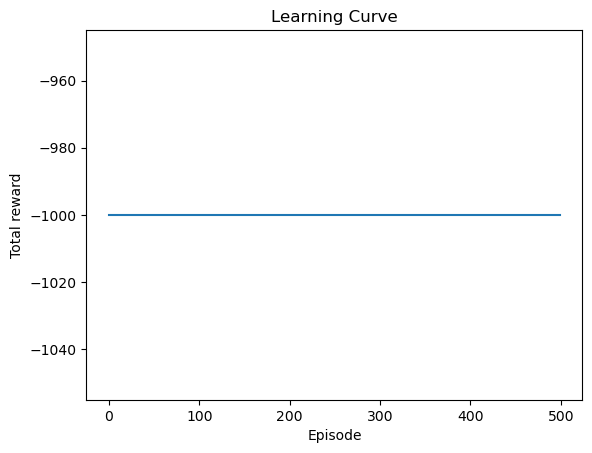

In [60]:
#plt which output a learning curve
plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.title('Learning Curve')
plt.show()

In [64]:
#Extrat policy
def extract_policy(Q):
    policy = {}
    for r in range(n_rows):
        for c in range(n_cols):
            if maze[r, c] != 1:
                idx = state_to_index((r, c))
                policy[(r, c)] = np.argmax(Q[idx])
    return policy
policy = extract_policy(Q)
print("Learned policy")
for k, v in policy.items():
    print(k, '->', v)

Learned policy
(0, 2) -> 0
(0, 4) -> 0
(1, 4) -> 0
(1, 5) -> 0
(2, 1) -> 0
(2, 2) -> 0
(3, 2) -> 0
(3, 3) -> 0
(4, 4) -> 0
(5, 2) -> 0


In [ ]:
#Test run Greedy
state = (0, 0)
path = [state]

for _ in range(max_steps):
    action = np.argmax(Q[state_to_index(state)])
    state, _ = step(state, action)
    path.append(state)
    if is_goal(state):
        break
print("Path to goal: ")
print(path)